# k-최근접 이웃 알고리즘

거리가 가장 가까운 5개의 데이터 중에서 다수결의 원칙으로 데이터를 예측한다. 사실 데이터의 규칙을 찾기보다는 전체 데이터를 저장해두는 것이다.

---

도미와 빙어를 분류하는 문제를 k-최근접 이웃 알고리즘으로 구해보자


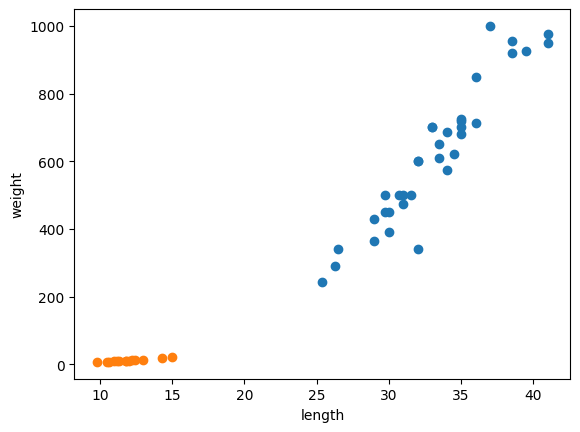

In [ ]:
## 데이터 준비

import matplotlib.pyplot as plt

# 도미 데이터(35개)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0,
                700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어 데이터(14개)
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [ ]:
## 사이킷런: 파이썬의 대표적인 머신러닝 패키지
# 입력은 2차원의 데이터! 정답은 1차원의 데이터!

# 입력 데이터
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
fish_data = [[l,w] for l,w in zip(length, weight)]

# 정답 데이터
fish_target = [1]*35 + [0]*14   #도미=1, 빙어=0로 가정한다

fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [ ]:
## KNeighborsClassifier 클래스: k-최근접 이웃 분류 모델을 구현하는 사이킷런 클래스

# fit(입력 데이터, 정답 데이터) 메서드: 주어진 데이터로 모델을 훈련시킨다
# score(입력 데이터, 정답 데이터) 메서드: 주어진 데이터로 모델을 평가하여 0~1의 정확도를 반환한다
# predict(입력 데이터) 메서드: 입력 데이터의 정답을 예측하여 반환한다

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
print(kn.score(fish_data, fish_target))
print(kn.predict([[30,600]]))

1.0
[1]


In [ ]:
## KNeighborsClassifier 클래스의 다양한 속성과 매개변수

# _fit_X 속성: 입력 데이터를 저장한다
# _y 속성: 정답 데이터를 저장한다
# n_neighbors 매개변수: 가장 가까운 몇 개의 데이터를 참고할지 지정한다 (기본값은 5)

print(kn._fit_X[:5], '\n')
print(kn._y, '\n')
print(kn.n_neighbors)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]] 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0] 

5


# 훈련 세트와 테스트 세트

샘플링 편향을 막으면서 전체 데이터 세트를 훈련 세트와 테스트 세트로 나눈다
*   훈련 세트: 훈련에 사용하는 데이터
*   테스트 세트: 평가에 사용하는 데이터




In [ ]:
## 넘파이: 파이썬의 대표적인 배열 라이브러리

# array(리스트) 함수: 리스트를 배열로 바꿔서 반환한다
# arange(n) 함수: 0~n-1의 배열을 생성한다
# shuffle(배열) 함수: 주어진 배열을 무작위로 섞는다

import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

np.random.seed(42)    #랜덤 시드 지정
index = np.arange(49)
np.random.shuffle(index)

index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

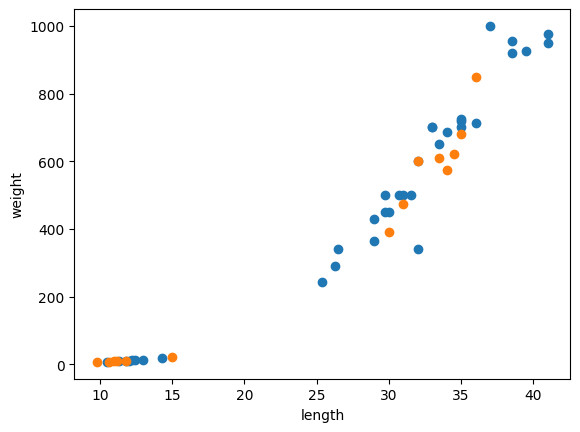

In [ ]:
## 훈련 세트와 테스트 세트 나누기

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



In [ ]:
## 훈련 세트와 테스트 세트를 구분한 모델

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))
print(kn.predict(test_input) == test_target)

1.0
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


# 데이터 전처리

데이터를 가공하는 단계이다. 거리 기반의 알고리즘은 제대로 사용하려면 특성값의 스케일을 맞춰춘다. 주로 표준점수(z 점수)로 전처리한다.


훈련 세트를 변환한 방식 그대로 테스트 세트도 변환해야 한다.


*   z 점수 = (값-평균) / 표준편차




In [ ]:
### 넘파이로 데이터 준비하기

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
## 입력 데이터
# column_stack((리스트1, 리스트2)) 함수: 리스트를 차례대로 나란히 연결한 배열을 반환한다
fish_data = np.column_stack((fish_length, fish_weight))

## 정답 데이터
# ones(n): n개의 1을 포함한 배열을 반환한다
# zeros(n): n개의 0을 포함한 배열을 반환한다
# concatenate((배열1, 배열2)): 배열1과 배열2를 연결한 배열을 반환한다
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [ ]:
### 훈련 세트와 테스트 세트 나누기

## train_test_split(배열) 함수: 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어 반환한다
## 반환값의 개수가 입력값의 개수의 2배가 된다
# test_size 매개변수: 테스트 세트로 나눌 비율을 지정한다 (기본값은 0.25)
# stratify 매개변수: 정답 데이터를 전달한다 -> 클래스 비율에 맞게 데이터를 나눈다

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,
stratify=fish_target, random_state=42)    #랜덤 시드 지정

test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
### 훈련하기

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)


KNeighborsClassifier()

[0.]


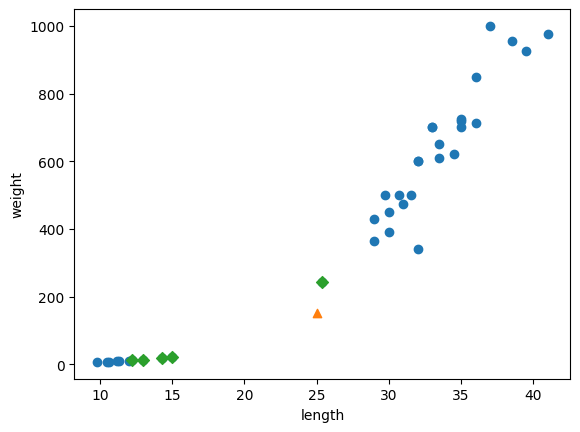

In [ ]:
### 데이터 스케일이 다를 때 문제점

## kneighbors(입력 데이터 예시) 메서드: 입력 데이터에서 가장 가까운 이웃들의 거리 배열과 인덱스 배열을 반환한다
## n_neighbors 매개변수에 해당하는 길이의 배열을 반환한다

print(kn.predict([[25, 150]]))    #시각적으로 가까운 1(도미)가 아니라, 0(빙어)를 예측한다

import matplotlib.pyplot as plt
distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
### 데이터 전처리

## 브로드캐스팅: 넘파이 배열에서 사칙 연산을 자동으로 모든 행이나 열로 확장하여 수행하는 기능이다

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

scaling = lambda arr: (arr-mean) / std

train_scaled = scaling(train_input)
new_input = scaling(np.array([[25, 150]]))
test_scaled = scaling(test_input)

kn.fit(train_scaled, train_target)

print(kn.score(test_scaled, test_target))
print(kn.predict(new_input))

1.0
[1.]
